# Programming for Data Analytics - Project 2020

Author: Sheldon D'Souza; Email: G00387857@gmit.ie
***


## Project Objective:

The objectives of this project are as follows:

- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook

## Project Plan

- Decide on real-world phenomenon
- Identify dependent and independent variables for the phenomenon
- Research the variables and the data surrounding these variables
- Research the attributes and distributions of the variables
- Research the interdependencies between the variables
- Research generating the dataset using python taking into account the interdependencies
- Generate the dataset

## Scratchpad - to be deleted on the completion of the project

- Ideas
    - Impact on Avg Blood Glucose of carbohydrates, bmi, exercise, glycemic index
    - Impact on starting salary of experience, qualification, certifications, training etc.
    - Impact on Life Expectancy of various factors
    - Average Domestic Electricity Consummption - BER Rating (Insulation), Size of the house (depends on year of construction), Average occupancy (number of occupants and time spent at home), Time of year (Outside Temperature and Number of hours of Daylight - Depends on the season)

## Dataset to explored and generated


### Scope of the project

The scope of the data I will explore is the factors which impact the average monthly domestic electricity consumption of a household in Dublin. Some of the data (where relevant) will be extrapolated or inferred from national or international statistics and where I have made these assumptions, I will make this clear in the relevant section.

### Dataset

 The variables which I will explore are as follows:

- Average monthly electricity consumption for a household - Independent variable measured in KWkh.

- BER Rating of the house - Done

- Size of the house - Done

- Year of construction of the house (Baked-in into the BER as average across years of construction taken) - Done - documented below


- Average occupancy (number of occupants (Poisson distribution) - Done


- Temperature (Normal Distribution) - Done

- Number of hours of Daylight - for simplicity simple to take monthly average and use the same function as for BER - Done
- Season of the year - Uniform distribution - slight variations? - Done


We will explore each of the variables in the sections below:

In [45]:
# Generating the dataset:

#1 - Generate each variable in the form of a column dataset as lists
#2 - Convert the lists to and from arrays where needed
#3 - Generate the factors for independent variables
#4 - Generate the independent variable data
#3 - Compile into a pandas dataframe

import numpy as np
rng = np.random.default_rng()


# Generate the months of the year. 
# This data is not part of the dataset but is used to generate the seasons and average temperature variables
# I have used the choice function in numpy to generate a random month for point of data.
# January is coded as 1, February as 2 etc.

months_code = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
months = rng.choice(months_code, replace=True, size=100)
#print(months)


#Generate the BER rating data

bers = np.array(['A', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G']) # Array of BER Names/Ratings
probs = np.array([0.07, 0.01, 0.03, 0.08, 0.12, 0.12, 0.12, 0.12, 0.10, 0.06, 0.05, 0.05, 0.07]) # Probability table of each rating
ber_rating = rng.choice(bers, p=probs, replace=True, size=100) #Generate the BER data based on the probability table using the choice function 
print(ber_rating)

#Generate the Temperature data
# The months data is used to pick the index value of the average monthly temperature array  
# (months - 1) is used as the index code is one less than the months code (index starts from 0)

temps = np.array([8, 8, 10, 12, 15, 17, 19, 19, 17, 14, 10, 8]) # Array of monthly average temperature
avg_temp = (rng.normal(loc=temps[(months-1)], scale=3)).astype(int) #normal distribution using the temperature for the given month
print(avg_temp)


#Generate floor size data
#The overall national average for for floor size works out to be 112 sqm. 
# The lowest value within the table is 41 sqm and and the highest value is 216 sqm.
# Normal distribution is used with a mean of 112 and SD of 30.
# Converted data to integers

floor_size = (rng.normal(loc=112, scale=30, size=100)).astype(int)
print(floor_size)


# Generate the household size / occupancy data
# Used the pareto distribution adjusted by a factor of two as the original pareto in numpy only generates data between 0 and 1
# Used numpy.select function to cap the household size at 10 persons
# Converted data to integers (whole number persons)

occupancy_initial = ((rng.pareto(2.75, 100) + 1) * 2) # Formula taken from Numpy official documentation
occupancy_dist = np.select(condlist= [occupancy_initial < 10, occupancy_initial >= 10], choicelist = [occupancy_initial, 10])
occupancy_final = occupancy_dist.astype(int) 
print(occupancy_final)


#Generate the Hours of Daylight data

daylight = np.array([8, 10, 12, 14, 16, 17, 16, 15, 13, 11, 9, 8]) # Array of actual monthly averages of daylight
daylight_hours = daylight[(months-1)] #Use the index of the months data generated above to select the average hours from the array above
print(daylight_hours)

# Generate season of the year data
#Summer = (June, July, August) Autumn = (September, October, November) 
# Winter = (December, January, February) Spring = (March, April, May)
# Used numpy.select to select the seasons from a choicelist based on the condition list of the months

season = np.select(condlist = [months == 6, months == 7, months == 8, months == 9, months == 10, months == 11, months == 12, \
                               months == 1, months == 2, months == 3, months == 4, months == 5], \
                   choicelist = ['Summer', 'Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter', 'Winter', 'Winter', \
                                  'Spring', 'Spring', 'Spring'])
print(season)


['C1' 'A' 'G' 'C1' 'C2' 'E1' 'C2' 'C3' 'B2' 'D1' 'C2' 'C2' 'C1' 'D2' 'D1'
 'B3' 'A' 'C1' 'D2' 'E2' 'C1' 'C3' 'B3' 'B3' 'C3' 'B3' 'D1' 'C3' 'A' 'G'
 'D2' 'F' 'E2' 'C2' 'A' 'E2' 'C2' 'D2' 'F' 'D1' 'C1' 'C2' 'C2' 'E1' 'D1'
 'C2' 'G' 'D2' 'B3' 'G' 'D1' 'B1' 'C2' 'B3' 'B3' 'D2' 'C3' 'B2' 'A' 'D1'
 'C2' 'C2' 'D2' 'D2' 'D1' 'C2' 'A' 'C3' 'D1' 'C1' 'C1' 'B3' 'C2' 'C2' 'D2'
 'C2' 'E1' 'C3' 'C1' 'C3' 'D2' 'G' 'C1' 'D2' 'B3' 'C2' 'C2' 'C3' 'E1' 'C3'
 'B3' 'E2' 'B3' 'A' 'B2' 'C3' 'E1' 'A' 'B3' 'A']
[ 7 22 15 19  7  8 25 11 15  5 14 15  8 11 10 19 14 14 13 18 15 22  5 13
 10  8 18 25 17  8  9 15 11 16 11  4 18 11 13  9 10 14  9 12 10 17 15  5
 19 10 15  9 10 11 18 12 10 18 18 20 25 17  6  6 13  8  7 20 12  4  8 19
 12 14  0 11 15 10 21  4 15  9  5  8 13 18  1 12  8  9 13 19 12 11  5  6
 22  6 15 19]
[128 151  85 111  65 128  99  50  69 128 122 118 107 198 140  46  82  85
  58  79 124  81  43 113 112 111 125 101 100 122  96 107 137 139  56 111
  83 106  13 130 110 101  96  89 104 140 112 134  79 150

In [46]:
#Using a for loop to select each item in the BER array and extract the index from the bers list
# Used the BER index to extract the related enegery consumption values from the list below. 

templist = [] #empty list to hold the energy ratings data
initial_energy_values = [37.50, 87.50, 112.50, 137.50, 162.50, 187.50, 212.50, 242.50, 280, 320, 360, 415, 500] #Energy consumption array

for item in list(ber_rating):
    a = list(bers).index(item)
    templist.append(list(initial_energy_values)[a])

energy_values = np.array(templist) #convert list to an array
print(energy_values)



[162.5  37.5 500.  162.5 187.5 320.  187.5 212.5 112.5 242.5 187.5 187.5
 162.5 280.  242.5 137.5  37.5 162.5 280.  360.  162.5 212.5 137.5 137.5
 212.5 137.5 242.5 212.5  37.5 500.  280.  415.  360.  187.5  37.5 360.
 187.5 280.  415.  242.5 162.5 187.5 187.5 320.  242.5 187.5 500.  280.
 137.5 500.  242.5  87.5 187.5 137.5 137.5 280.  212.5 112.5  37.5 242.5
 187.5 187.5 280.  280.  242.5 187.5  37.5 212.5 242.5 162.5 162.5 137.5
 187.5 187.5 280.  187.5 320.  212.5 162.5 212.5 280.  500.  162.5 280.
 137.5 187.5 187.5 212.5 320.  212.5 137.5 360.  137.5  37.5 112.5 212.5
 320.   37.5 137.5  37.5]


In [51]:
# Code for generating factors to increase/decrease mean consumption
# Generate factors for each variable above its mean and then give the variable a weighting based on importance
# Equal importance (weighting) has been given to all factors, although certain factors in practice 

temp_factor = ((avg_temp / np.mean(temps))*0.5) # ratio of generated temperature by avg annual temp into a weighting of 30% (assumed) 

size_factor = (floor_size / 112) * 0.5 # ratio of generated floor size to averge floor size

hhsize_factor = (occupancy_dist / 2.75) *0.5 # ratio of generated occupancy to average occupancy

daylight_factor = (daylight_hours / 12) *0.5 # ratio of generated daylight hours to average daylight hours


cumulative_factor = temp_factor + size_factor + hhsize_factor + daylight_factor

a = np.around((energy_values * cumulative_factor),2)

print(a)

print(a - energy_values)

[ 326.31  103.9  1034.22  383.75  252.02  656.06  515.03  310.56  188.72
  475.86  424.86  386.35  244.77  611.25  448.74  281.39   67.81  324.99
  467.81  910.11  379.65  506.31  278.32  259.19  437.97  232.41  529.67
  606.34   75.57  798.16  435.02  873.25  668.14  433.78   53.83  534.2
  436.94  568.97  798.14  457.45  281.41  378.41  333.09  618.57  434.75
  443.25 1151.17  467.24  303.07 1191.62  513.15  126.92  319.74  304.49
  291.27  563.41  415.16  267.9    86.23  557.27  488.25  455.2   796.63
  384.64  476.8   344.23   63.05  466.81  376.55  277.84  307.05  302.75
  371.43  428.25  362.99  343.04  631.28  523.81  541.18  282.61  603.29
  988.68  247.83  578.1   300.97  422.81  270.12  356.92  687.05  357.51
  229.6  1000.62  280.17   67.69  168.03  371.58  736.85   69.18  322.37
   93.21]
[163.81  66.4  534.22 221.25  64.52 336.06 327.53  98.06  76.22 233.36
 237.36 198.85  82.27 331.25 206.24 143.89  30.31 162.49 187.81 550.11
 217.15 293.81 140.82 121.69 225.47  94.91 287

#### Average monthly electicity consumption

**Datatype:**

This will be a numeric variable which will be denoted in Kilowatt hours (kWh). This will be a determined by a algorithim based on the dependent variables, as described in the sections below.





Relationship with each of the variable




##### BER Rating of a house

**Datatype:**

This is a categorical variable ranging from A to F. Certain categories have further sub-divisions, most notably C1 C2 and C3. 

Note that the data for the the kWh/m2/annum has been given in table below. As this is the averge usage, it is reasonable to assume that the data is uniforml distributed over 12 months. I have assumed that for the purposes of the project. 


**Nature of the variable"**

*What is BER*

>Building Energy Rating (BER) certificates were introduced in Ireland in 2007, as required under the Energy Performance in Buildings Directive. The purpose of a BER is to make the energy performance of a dwelling visible and comparable to other dwellings on a like for like basis, allowing buyers and tenants to consider energy performance when deciding to purchase or rent a building. To do this the BER rates the theoretical energy performance of a dwelling, assigning it a rating from A1-G based on a calculation of the primary energy consumption in kWh per metre squared per year under standard conditions. Therefore a BER is similar to the energy rating on appliances, with A rated homes being the most energy efficient (and likely to have lower energy bills) and G rated homes being the least energy-efficient. The most efficient rating is an “A1” rating, which represents annual energy consumption of less than 25 kWh/m2.
>


**Reason for choosing the variable & Relationship with Independent variable:**

The BER rating is an important variable for estimating the average energy consumption of a residence. As mentioned above, there is considerable amount of data gathered by the Central Statistics Office ('CSO') and  Sustainable Energy Authority of Ireland (SEAI) which has been compiled to show a  statistical link between the BER rating (along with the average floor area) to give the averge energy consumption of residential accomodation.


I used the BER distribution table (detailed in the section below) to generate the distribution of BER data for the Project's dataset.  I used the 'primary consumption bands' data (see below) to translate a particular BER rating into the power consumption per annum per square meter.

In other words the relatonship between independent and dependent variable is as follows:

BER Rating -----> Primary Energy kWh/m2/annum x Average Floor Area (m2) ----> Average Energy Consumption (Base value)


**Sources of Actual data and details:**

I obtained the data below from the Sustainable Energy Authority of Ireland (SEAI) - Energy in the Residential Section (2018). The table within this report provides for ranges or bands of average energy consumption which are based on the BER rating for a property (or vice versa).


*Primary Energy Consumption of bands on the BER scale.*

>
| BER Grade | A1 | A2 | A3 | B1 | B2 | B3 | C1 | C2 | C3 | D1 | D2 | E1 | E2 | F | G |
|:--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Primary Energy kWh/m2/annum | <25 | >25 | >50 | >75 | >100 | >125 | >150 | >175 | >200 | >225 | >260 | >300 | >340 | >380 | >450 |

>Source: SEAI
>
> Reference: https://www.seai.ie/publications/Energy-in-the-Residential-Sector-2018-Final.pdf


The above table comprises of ranges or bands of consumption for each BER rating category. In order to use this data for the algoritim within the Project, I have repurposed the table above by taking the mid value of the range as a starting point for consumption for each BER Category.

I have made a few assumptions to re-organise the above data to make it fit for purpose:

1. I have merged the three A categories (A1, A2, and A3) together as the actual distribution of BER rating from the Central Statistics Office (CSO) does not distinuguish between these categories and therefore for compratbility purposes I have taken the three as one category A
2. I have taken the mid range of each category and resdesigned the table accordingly
3. I have assumed that the distribution of the consumption is evenly spread throughout the year
4. In light of assumption 2 above. I have increased or decreased the kWh/m2/annum for each BER rating based on a number of factors such as Average occupancy,  Temperature, Number of hours of Daylight and Season of the year.
5. The dataset being generated is a dataset of existing build of houses, not newly built ones, as newly built houses will tend to skew towards an 'A' BER rating.

| BER Grade | Consumption Range | Mean Consumption |
|--- | --- | --- |
| A | 0 - 75 | 37.50 |
| B1 | 75 - 100 | 87.50 |
| B2 | 100 - 125 | 112.50 |
| B3 | 125 - 150 | 137.50 |
| C1 | 150 - 175 | 162.50 |
| C2 | 175 - 200 | 187.50 |
| C3 | 200 - 225 | 212.50 |
| D1 | 225 - 260 | 242.50 |
| D2 | 260 - 300 | 280 |
| E1 | 300 - 340 | 320 |
| E2 | 340 - 380 | 360 |
| F | 380 - 450 | 415 |
| G | 450 - 550 | 500 |


**Statistical Distribution of Data and reasons for choosing this distribution:**

*Distribution of BER ratings across the country*

The National average percentage of the BER ratings for each rating category is given below. This has been taken from the CSO Website for Q3 2020. I have used the national average as this most closely resembles the Dublin data and I believe it will be better approximation for Dublin as a whole considering Dublin makes the highest proportion of the statistics. I have also taken an average of all 'Year of Builds' and **so we can assume for the purposes of this that the BER below bakes in the year of build of the house**.

| BER Grade | A	| B1| B2 | B3 | C1 | C2 | C3 | D1 | D2 | E1 | E2 | F | G | Total |
|:--- | ---	| ---| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|**National BER distribution %** | 7 | 1 | 3 | 8| 12 | 12 | 12 | 12 | 10 | 6 | 5 | 5 | 7 | **100** |


Domestic BER Rating - Q3 2020: CSO Website - https://www.cso.ie/en/releasesandpublications/er/dber/domesticbuildingenergyratingsquarter32020/



**Basis of using the statistical distribution:**

The BER rating is not likely to fit a standard statistical distribution such as a normal distribution, pareto distribution, poisson distibution etc. As can be seen from the actual distribution data in the table above, there may be a case to use a normal or poisson distribution, as the data is signifcantly heavier around the central values and tapers off on either end of the BER rating categories. However in this case, it may be best to model the Project's dataset, around the actual data by assigning the actual distribution in the table above as probabilities of occurance for our Dataset. I decided to this as (1) there is actual data available which closely emulates the values I am trying to generate within the dataset (3) The data within the dataset does not show any concrete distribution (2) there are no other datasets available on which I can base a conclusion regarding distibution.



I will use the choice function within numpy random to generate the dataset and assign probabilities (based on the table above) to each of the BER rating categories. 


**Interdependence between variables:**
- As mentioned above the BER rating and the size of the house go hand in hand to generate the average energy consumption for a property.
- The Year of Build could be seperated out as a seperate variable, however, as mentioned above I have selected the BER consumption to bake this into the kWh/m2/annum data. I considered splitting the year of build as a seperate variable. This created a number of challenges mainly (1) while the year of construction for a property could be generated based on the average housing stock for each year (e.g. no of planning permissions issued or no. of BER certificates for each year/build of houses) however (2) deriving a BER rating from a year of contruction alone would be too arbitary to generate data with a reasonable statstical basis. I have therefore not explored this further for the purpose of this project. 

**References:**

Provided above in each individual section



### Average temperature


**Datatype:**

This is a numerical variable with a whole integer values. These values can be negative or positive. In reality this will be a continuous floating number dataset, but for the purpose of this project, I have used whole numbers only.


**Nature of the variable:**

The variable represents the mean outside temperaure for a given month in Dublin as measured by the weather station at Dublin airport.


**Reason for choosing the variable & Relationship with Independent variable:**

The outside temperature has a direct relationship with the residential energy consumption. In hotter or colder temperature the residential energy requirements may increase. e.g. the colder the weather the more heating is required and heating mechanisms of the house may be used for longer periods. Similarly in heat waves or storms, there may be amounts of energy consumed.

*Academic sources for this link between energy consumpyion and weather is as follows:*

SOURCE 1: ERNEST ORLANDO LAWRENCE BERKELEY NATIONAL LABORATORY - A Fresh Look at Weather Impact on Peak Electricity Demand and Energy Use of Buildings Using 30- Year Actual Weather Data (Authors: Tianzhen Hong, Wen-kuei Chang, Hung-Wen Lin)

https://www.osti.gov/servlets/purl/1171482

>Main findings from this study are (truncated to include only relevant findings): 
>1) annual weather variation has a greater impact on the peak electricity demand than on the energy use in buildings
>2) the weather impact is greater for buildings in cold climates; 
>3) the weather has the greatest impact on the medium-size office building, followed by the large office and then the small office;


SOURCE 2: Department of Geography, National University of Ireland Maynooth, Maynooth, Ireland - IMPACTS OF CLIMATE CHANGE ON ENERGY DEMAND IN THE GREATER DUBLIN REGION, IRELAND (Authors: Xiaochen Liu and John Sweeney)

>Results indicate that residential energy demand in the Greater Dublin region are sensitive to climate...


SOURCE 3: United States Environmental Protection Agency (EPA) - Climate Impacts on Energy

https://19january2017snapshot.epa.gov/climate-impacts/climate-impacts-energy_.html

>In a warmer climate, Americans will use more electricity for air conditioning and less natural gas, oil, and wood for heating. If the nation's climate warms by 1.8°F, the demand for energy used for cooling is expected to increase by about 5-20%, while the demand for energy used for heating is expected to decrease by about 3-15%



**Sources of Actual data and details:**

I generated the average temperature data based on the actual historical data from the Met Ireland (see section below on independent research I conducted for the purpose proving statistical distribution). I used this data to generate the average temperature using the inter-dependent variables within the dataset.

See the code below, on how I generated a list of average temperatures for each of the months of the year.


**Statistical Distribution of Data and reasons for choosing this distribution:**

I analysed the literature available on the potential distribution that temperature related will follow. I reviewed a number of academic sources as well as conducted independent research on the weather data for Dublin. These are discussed below:

SOURCE 1 - Probability distributions of monthly-to-annual mean temperature and precipitation in a changing climate - Jouni Räisänen, Department of Physics, P.O. Box 48, FI-00014 University of Helsinki, Finland 

https://en.vedur.is/media/ces/CES_D2.4_task1.pdf

In this paper, among other things, the author goes through the probability distribution for temperature related data for Helsinki, Finland for each month in a 12 month period. Thus data is plotted on page 8 of this report. Each of the plots, show a normal type distribution for both the predicted and the actual data.



SOURCE 2: Global Temperature in 2015 (Authors: James Hansena , Makiko Satoa , Reto Ruedyb,c Gavin A. Schmidtc , Ken Lo)

http://www.columbia.edu/~jeh1/mailings/2016/20160120_Temperature2015.pdf

Although the purpose of the paper is to show the increase in Global temperature, page 4 of the report shows the distribution of seasonal mean temperature in Northern Hemisphere land areas. Again, it as in the previous paper, it is very easy to see that the mean temperature here follows a normal distribution. The paper refers to the distrubution as a 'bell curve' which again is indicative of a normal distribution for temperature 


SOURCE 3: INDEPENDENT RESEARCH To Prove that monthly temperature follows a normal distribution:

Reading the above literature, I theorised that I should be able to prove that temperature follows a normal distribution.


To do this, I downloaded the Irish daily weather data for Dublin airport and plotted a histogram of the distribution of the maximum daily for each month as well as on an overall basis. The data (found at the link below) showed that a normal distribution is a reasonable approximation for the distribution of monthly temperature.

The dataset link: https://cli.fusio.net/cli/climate_data/webdata/dly532.zip 

Taken from the website https://www.met.ie/climate/available-data/historical-data (Met Ireland)


I used pandas to load the dataset into a Dataframe and plotted (as an example) the daily mean temperature since the 1940's to date. See below for code used.


**Basis of using the statistical distribution:**

There is substantial data from independent studies as well as from my independent research to make a reasonable conclusion that the mean daily temperature should follow a normal distribtion.


**Interdependence between variables:**

- The mean temperature is closely linked to the season of the year i.e. the outside temperature will generally vary by season (summer, winter, autumn or spring).


**References:**

Mentioned in each section above


**Code used for independent research to check whether mean daily temperature follows a normal distribution:** 

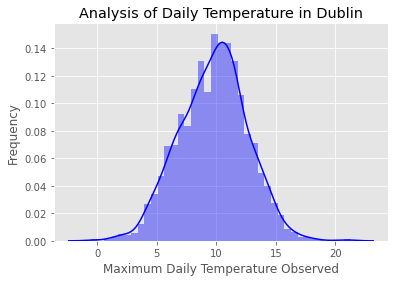

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df = pd.read_csv("dly532.csv", skiprows=25)
df['newdate'] = pd.to_datetime(df['date'])
df_hist = df[(pd.DatetimeIndex(df['newdate']).month == 3)]['maxtp'] #Adapted from (https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column)


temp_data = sns.distplot(df_hist, color = 'blue')
temp_data.set(xlabel="Maximum Daily Temperature Observed", ylabel = "Frequency", title="Analysis of Daily Temperature in Dublin")

plt.show()

**Conclusion from the above analysis and generating actual data:**

Based on the above analysis, I generated the temperature using a normal distribution whereby:
1. the mean temperature data from the pandas dataframe loaded from Met Ireland. See cell below for calculation.
2. assumed a standard deviation of 3 (as conventional for a normal distribution)

**Actual mean temperature data based on the dataset from Met Ireland:** 

In [2]:
# Generate a list of monthly averages from the data at :

weather_monthly_averages = []
for m in range(1, 13):
    weather_monthly_averages.append(int(round(df[(pd.DatetimeIndex(df['newdate']).month == m)]['maxtp'].mean(),0)))

print(weather_monthly_averages)


[8, 8, 10, 12, 15, 17, 19, 19, 17, 14, 10, 8]


### Average size of a house

**Datatype:**

This is a numeric variable expressed in meteres squared (sqm). The value is required to be greater than zero. However in practice, we would expect this value to be at least 25 sqm (as per a Google search for the smallest house in Ireland).


**Nature of the variable:**

The variable represents the size of a house in square meters.


**Reason for choosing the variable & Relationship with Independent variable:**

This is perhaps one of the most important dependent variables on which the independent variable depends i.e. the size of the house is directly correlated with the amount of energy consumed by a household.

As noted in the BER section above, the averge energy consumption can be reasonably estimated from the size of the house. As there is an numerical table which estimates the annual energy consumption from size of the house. Since this data is available and used nationally, I have chosen to do so as well. 


**Sources of Actual data and details:**

Table 11 of the DOMESTIC BUILDING ENERGY RATINGS - QUARTER 3 2020, quantifies the average 'floor' area of residential accomodation in Ireland.

Table 11 is breaks down the residential accomodation by by Period of Construction and Type of Dwelling.

The overall national average for for floor size works out to be 112 sqm. The lowest value within the table is 41 sqm and and the highest value is 216 sqm.

An argument can be made that it would have been better to use the weighted average floor area in order to provide a better estimate, for the purpose of this project the use of the average from the CSO.ie website is not unreasonable.

While there are other estimates which were available which ranged from 88 sqm (https://kk.org/extrapolations/size-of-homes-global/) to 160 sqm (https://perfectproperty.ie/advice/entry/can-you-build-house-150k-ireland/). The most reliable estimate will be from the CSO and therefore this is the value I have taken as the mean to build upon my distribution.



**Statistical Distribution of Data and reasons for choosing this distribution:**

I theorised based on anecdotal research (e.g. Fig 3 of Understanding Compressive Adversarial Privacy - Xiao Chen, Peter Kairouz, Ram Rajagopal - https://arxiv.org/pdf/1809.08911.pdf) , that the distribution for floor area should follow a normal distribution.

I also considered whether a Poisson distribution or a Paretto distribution may be more appropriate. I considered the Poisson distribution as a normal distribution would would be symetrical whereas a Pareto distribution may be more widely distributed and thus may more correctly reflect the distribution of floor size area. I also considered the Pareto distribution, however there was no real evidence to suggest that this would be a valid distribution and hence I did not pursue this further.

In order to further explore which would be a better fit, I explored publically available datasets to ascertain whether I would be able to deduce a reasonable statistical distribution to use for house floor area.

While there was very limited data available for the distribution of average floor size, there were some datasets which showed the distribution of the number of rooms and number of bedrooms. It is therefore reasonable to assume that the floor area of a house should be able to be deduced from the number of rooms and bedrooms. Therefore the distributions of the number of bedrooms and rooms should closely approximate the distribution that the floor area of houses should follow:

I explored the following datasets:

*Boston Housing Dataset:*

As per https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html:

>The Boston Housing Dataset dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. The dataset is small in size with only 506 cases.
>
>The data was originally published by Harrison, D. and Rubinfeld, D.L. Hedonic prices and the demand for clean air, J. Environ. Economics & Management, vol.5, 81-102, 1978.


I used sklearn to load this Dataset and extracted the distribution of the number of rooms. I then used searborn to plot a a histogram of the room sizes within the dataset (using distplot).

The distribution of the number of rooms looks visually like a normal distribution with the mean of 6 and a standard deviation of 3 on either side of the mean. The distribution also seems to be symmetrical on each side of the mean which is an indication of a normal distribution.

Therefore, from this dataset it seems like the normal distribution is the most appropriate.


*Data from the 2011 Census released by the Office for National Statistics (ONS):*

I extracted the dataset from the 2011 Census for Household Characteristics - rooms and bedrooms from the https://www.surreyi.gov.uk/. This is the number of rooms in a household's accommodation. The definition of a room does not include bathrooms, toilets, halls or landings, or rooms that can only be used for storage. All other rooms, for example, kitchens, living rooms, bedrooms, utility rooms, studies and conservatories are counted.

I plotted a bar plot showing of the number of rooms and their distribution within the datset. 

Once again the dataset shows to be normally distributed with a symmertrical distribution around the mean. While a normal distribution is not undisputable it is not unreasonable to conclude that the distribution does show some characteristics of a normal distribution.

Dataset from wiki.csc.calpoly.edu:

The following data was taken from the following website:

https://justinsighting.com/how-to-use-linear-regression-to-predict-housing-prices/

The dataset used has been taken from wiki.csc.calpoly.edu. The dataset is since no longer available from the original source, however I have used the dataset from the website above. I cannot be certain about the veracity of the dataset however for the purpose of finding out the type distribution I have deemed this to be appropriate.

The data was the only one I could find which showed a statistical distribution of residential floor area. I loaded in the data from the above source and plotted a histogram using seaborn.

The plot once again was closest visually to a normal distribution albeit not quite symmetrical but instead skewed to the left. However, once again it is not unreasonable to assume that the normal distribution is the most appropriate.


**Basis of using the statistical distribution:**

Based on the above analysis, it seems reasonable to conclude that a normal distribution is the most appropriate to use for the distribution of floor size. While in real world scenarios this distribution not come to fruition, especially since housing often received intervention from local and national government. However for the purpose of this project, it is appropriate to assume that house floor area will follow a normal distribution.  


**Interdependence between variables:**

- There is some evidence to suggest that house size and number of occupants are correlated, however this is not definitive correlation as a large houses can be occupied by smaller families and vice versa. I have therefore not explored this aspect further within this dataset.



**References:**

CSO BER Q3 2020 - Table 11 - https://www.cso.ie/en/releasesandpublications/er/dber/domesticbuildingenergyratingsquarter32020/

Boston Housing Dataset - https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Dataset from wiki.csc.calpoly.edu: https://justinsighting.com/how-to-use-linear-regression-to-predict-housing-prices/

Data from the 2011 Census released by the Office for National Statistics (ONS): https://www.surreyi.gov.uk/dataset/2gdd0/census-household-characteristics-rooms-and-bedrooms





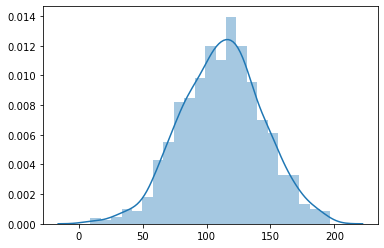

In [9]:
#Test to check whether the normal distribtion will generate data which reflects the size of a house

import numpy as np
import seaborn as sns
rng = np.random.default_rng()
s = rng.normal(112, 30, 1000)
import matplotlib.pyplot as plt
sns.distplot(s)
plt.show()

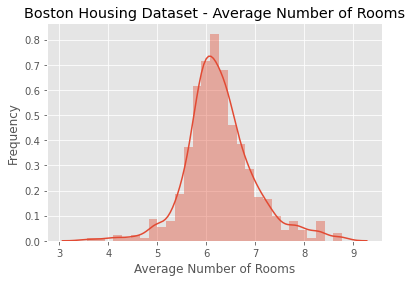

In [5]:
# Learnt to load the dataset from sklearn from the following website:
#https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

from sklearn.datasets import load_boston

df_boston = load_boston()
boston = pd.DataFrame(df_boston.data, columns=df_boston.feature_names)


room_nos_plot = sns.distplot(boston['RM'], kde=True)
room_nos_plot.set(xlabel="Average Number of Rooms", ylabel = "Frequency", title="Boston Housing Dataset - Average Number of Rooms")


plt.show()

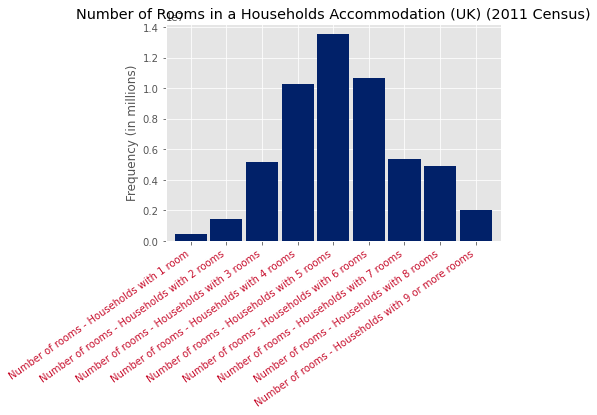

In [6]:
# Data from the 2011 Census released by the Office for National Statistics (ONS):
# Census: Household characteristics - rooms and bedrooms

# Data from: https://www.surreyi.gov.uk/dataset/2gdd0/census-household-characteristics-rooms-and-bedrooms

df_rooms = pd.read_csv("https://www.surreyi.gov.uk/download/2gdd0/9vy/Number%20of%20rooms.csv")
df_rooms.drop(df_rooms.columns[[0,1,2,3,5,7,9,11,13,15,17,19,21]], axis=1, inplace=True) #Removed unnecessary columns

df_rooms.loc['Total',:]= df_rooms.sum(axis=0) #Including the total of the dataset 

plt.ylabel('Frequency (in millions)')

#Plotting rows by tranposing data in place - https://stackoverflow.com/questions/52392728/create-a-histogram-based-on-one-row-of-a-dataframe:

df_rooms.T['Total'].plot.bar(title='Number of Rooms in a Households Accommodation (UK) (2011 Census)', width = 0.90, color = '#012169', alpha=1)
plt.xticks(rotation=35, ha='right', color='#c8102e') # https://stackoverflow.com/questions/43520322/matplotlib-move-x-axis-tick-labels-one-position-to-left

plt.show()


The follwing data was taken from the following website:

https://justinsighting.com/how-to-use-linear-regression-to-predict-housing-prices/

The dataset used has been taken from wiki.csc.calpoly.edu. The dataset is since no longer available from the original source, however I have used the dataset from the website above. I cannot be certain about the veracity of the dataset however for the purpose of finding out the type distribution I have deemed this to be appropriate.

I have analysed the data in the cell below:

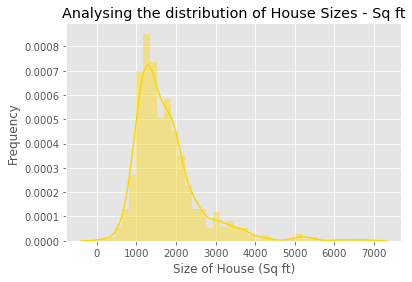

In [4]:
import pandas as pd
df_house = pd.read_csv("https://justinsighting.com/wp-content/uploads/2016/05/RealEstate.csv")

house_size = sns.distplot(df_house['Size'], color='gold')
house_size.set(xlabel="Size of House (Sq ft)", ylabel = "Frequency", title="Analysing the distribution of House Sizes - Sq ft")


plt.show()

## Average Occupancy 

**Datatype:**

This is a numerical variable expressed as a positive integer with values greater than 0.


**Nature of the variable:**

The variable represents the number of people living in a household.

**Reason for choosing the variable & Relationship with Independent variable:**

The number of people living in a household has a direct impact on the power consumption i.e. they are directly propertional to each other. The more the people in a household the more the power consumption of that household.

We can reasonably expect each additional person to have an impact on the power consumption of the house. The quantum of this impact is difficult to determine, though.

As per: https://www.bonkers.ie/guides/gas-electricity/national-average-energy-consumption/

The average energy consumption per person is generally thought to be around 4200kWh for electricity and 11,000kWh for Gas (i.e. a total of 15,200 kWh annually). This consumption for a 3 bedroom accomodation, but the data does not specify the number of people per household. I have therefore assumed this to be the national average of 2.75 persons per household (2016 Census: https://data.cso.ie/table/E1012 - See below). I have also assumed that the average sqm of the house is 112 (see section above for details on this). This works out to be 49kWh per person per sqm annually (13kWh per person per sqm for electricity and 36kWh per sqm per person for gas). The annual consumption for the UK per person for electricity is 1,985kWH per person (as per: http://shrinkthatfootprint.com/average-household-electricity-consumption) and so an average per person consumption of 1,456kWh is not unreasonable).

I will therefore use the per person consumption calculated above for the relation between average occupancy and the independent variable. 


**Sources of Actual Data and details:**

I have taken the data for Ireland from the Central Statistics Office for the 2016 Census. The repoert used is E1012- 'Average Number of Persons per Private Household in Permanent Housing Units 1971 to 2016'. The average number of persons for a household is 2.75 persons. 

I also corroborated this from the United Nations 'Household Size and Composition Around the World 2017' report. As per this report the average household size for Ireland is 2.7 which matched the CSO Data (as it was most likely taken from there)


**Statistical Distribution of Data and reasons for choosing this distribution:**

I have chosen the Poisson distribution as the data distribution for this variable.


*Research Paper:*

The main basis for choosing this distribution was based on the following research:

Poisson Distribution: A Model for Estimating Households by Household Size

Author: Beth Jarosz

Originally Presented: Population Association of America, 2013

Revised: July 2017

As per above paper:

>The Poisson distribution is used in cases where:
- Events can be counted in positive integers, and there is no upper limit on the number of events that may occur.
- Occurrences are independent, random.
- Each event is counted only once, and it is irrelevant how many cases have not occurred.
- Average frequency (or population mean) is known.
>
>As applied to the distribution of household by household size, this means:
- Households are counted in positive integers, and there is no (official) upper limit to household size, as described in more detail below.
- The size of any given household is independent and random. For example, if households A and B are neighbors, the number of people in household A is completely independent of the number of people in neighboring household B.
- Each household is counted only once. It is irrelevant how many households of, for example size 8, have not occurred. It is only relevant how many have occurred.
- It is possible to estimate and project average household size.

In other words the average size of the household meets the criterias for the Poission distribution.

The paper concludes as follows:

>Conclusion and Applications

>Tests on decennial census data in the U.S. (1990, 2000, and 2010) suggest that the modified Poisson distribution model is suitable for use in estimating the distribution of households by household size at the state, county, and census tract level. The model tends to under-estimate 1-person households, and over-estimate 3-person households. However, these known errors can be reduced through 14 implementation of an error-term adjustment process. The model tends to fit well for households of size 2 and for sizes 4 and larger

I have not adjusted for the 1 and 3 person households as above for the purpose of this project, but instead used a standard poisson distrubution using the averge household for Ireland from CSO.ie


*Additional Research:*

I did some further research using publically available data on how the average size of households are distributed.


1. Data from the 2011 Census released by the Office for National Statistics (ONS):

https://www.surreyi.gov.uk/dataset/emynm/census-household-characteristics-household-size-and-persons-per-room

I obtained the data for the size of a household from the UK 2011 Census, the distrubution there shows the greatest concentration for the 1 and 2 person households. The distribution shows a waning proportion for the 3 persons onwards distributions. A visual fit would indicate that this the distribution could follow a Paretto or a Possion distribution. However a Paretto distribution generally would have the concentration of a one person household more than the two person household (waning from first cateogory).

The poisson distribution would be a better fit here as the data is concentrated around more than one category (1 and 2 person household).


2. Data is from the Central Statistics Office (CSO):

https://data.cso.ie/table/E4026

I obtained the Households and Families data from the Irish 2016 census from the CSO and obtained the distribution of Irish household sizes. 

This data looks like a standard Poisson distribution.


3. Data from 2014 Myanmar Census:

I also analysed the distribution of household sizes from the 2014 Myanmar Census. Once again the data is very close to a Poisson distribution.


**Basis of using the statistical distribution:**

While a case could be made, to use the Paretto, Poisson or even the Normal distibution for the Average household size (the Irish and the Myanmar data could fit into a Normal distribution), based on the research paper above and the fact that a pareto model is not inappropriate based on my own analysis below, I have decided to use the Poisson distribution for the Average household dataset.


**Interdependence between variables:**

- The age demographic of the household can also have an impacton electricity consumption. However, I have not explored this aspect further for this project.
- Some evidence to suggest that house size and number of occupants are correlated, however this is not  definitive correlation as a large houses can be occupied by smaller families and vice versa. I have therefore not explored this aspect further within this dataset.



**References:**

https://www.researchgate.net/publication/226081704_Household_size_and_the_Poisson_distribution

https://data.cso.ie/table/E1012

https://www.un.org/en/development/desa/population/publications/pdf/ageing/household_size_and_composition_around_the_world_2017_data_booklet.pdf



**What does a standard Poisson Distribution look like:***

A standard Poisson distribution looks like the following:

*Image Reference: Real Statistics*

<img src="https://i0.wp.com/www.real-statistics.com/wp-content/uploads/2012/11/poisson-distribution-chart.png?ssl=1"
     alt="Poisson Distribution"
     style="float: left; margin-right: 4px;" />




In the sections below, I have analysed publically available datasets to see which distribution fits the Average Household Size data. I have obtained and cleaned the datasets and plotted via bar-plots, the distibution of the number of persons the household within the datset.

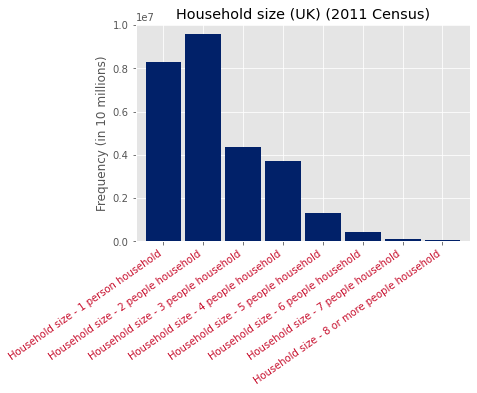

In [7]:
# Data from the 2011 Census released by the Office for National Statistics (ONS):
# Census: Household characteristics - household size and persons per room

# https://www.surreyi.gov.uk/dataset/emynm/census-household-characteristics-household-size-and-persons-per-room

# The size of a household is equal to the number of usual residents in the household. 


import pandas as pd
import matplotlib.pyplot as plt

df_hhsize = pd.read_csv("https://www.surreyi.gov.uk/download/emynm/g6z/Household%20size.csv")
df_hhsize.drop(df_hhsize.columns[[0,1,2,3,5,7,9,11,13,15,17,19]], axis=1, inplace=True)

df_hhsize.loc['Total',:]= df_hhsize.sum(axis=0)

plt.ylabel('Frequency (in 10 millions)')

#Plotting rows by tranposing data in place - https://stackoverflow.com/questions/52392728/create-a-histogram-based-on-one-row-of-a-dataframe:

df_hhsize.T['Total'].plot.bar(title='Household size (UK) (2011 Census)', width = 0.90, color = '#012169', alpha=1)
plt.xticks(rotation=35, ha='right', color='#c8102e') # https://stackoverflow.com/questions/43520322/matplotlib-move-x-axis-tick-labels-one-position-to-left

plt.show()


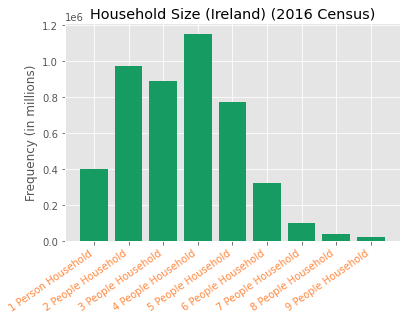

In [8]:
# The following data is from the Central Statistics Office - https://data.cso.ie/table/E4026
# Census 2016 \ Profile 4 - Households and Families \ E4026 - Private Households by Reference Person 2011 to 2016
# E4026 - Private Households by Reference Person (2011 to 2016)

# The following dictionary has been compiled based on the E4026 report from CSO.ie


irish_households_size = \
{'1 Person Household': 399815,
 '2 People Household': 973072, 
 '3 People Household': 892695, 
 '4 People Household': 1153312, 
 '5 People Household': 774205,
 '6 People Household': 324096,
 '7 People Household': 99974,
 '8 People Household': 35672,
 '9 People Household': 23807}


keys = irish_households_size.keys()
values = irish_households_size.values()

plt.bar(keys, values, color='#169b62', alpha=1)
plt.xticks(rotation=35, ha='right', color='#ff883e')
plt.ylabel('Frequency (in millions)')
plt.title('Household Size (Ireland) (2016 Census)')

plt.show()


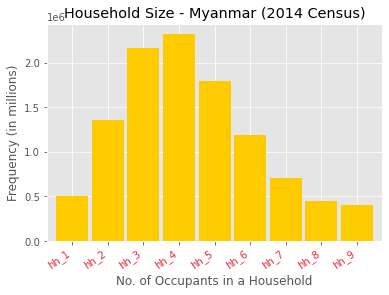

In [48]:
# Household size data from 2014 Myanmar Census
# The follwing is the data taken from: 
# https://data.laos.opendevelopmentmekong.net/en/dataset/household-and-population-data-for-states-and-regions/resource/480bb8e8-9e5b-461a-9114-9ccf886c8986
# This dataset includes information on the size of households at the Union level and State/Regional level.


df_laos_hhsize = pd.read_csv("https://data.opendevelopmentmekong.net/dataset/7bc0cabc-3c01-44fe-ba30-943a360c56fb/resource/480bb8e8-9e5b-461a-9114-9ccf886c8986/download/censusmeanhhsize.csv")
df_laos_hhsize.drop(df_laos_hhsize.columns[[0,1,2]], axis=1, inplace=True)
df_laos_hhsize_total = df_laos_hhsize.drop(df_laos_hhsize.index[1:])

plt.ylabel('Frequency (in millions)')
plt.xlabel('No. of Occupants in a Household')

df_laos_hhsize_total.T[0].plot.bar(title='Household Size - Myanmar (2014 Census)', width = 0.90, color = '#FECB00', alpha=1)
plt.xticks(rotation=35, ha='right', color='#EA2839')
plt.show()


### Number of Hours of Daylight


**Datatype:**

This is a numeric variable expressed as a positive integer with a value greater than zero. Although in reality this can be expressed as a continuous numerical value, for the purpose of this project I have rounded this up to the nearest integer value. 


**Nature of the variable:**

The variable represents the average number of hours of daylight.


**Reason for choosing the variable & Relationship with Independent variable:**

The number of hours of daylight, logically speaking will have an impact on energy consumption. As an example, the amount of time lighting is needed in a residential property will be much higher as the number of hours of daylight decrease and vice versa. This will increase the energy consumption for the period.

In order to explore the relationship of average hours of daylight with the independent variable, I have explored the impact of daylight saving time (DST) on the average energy consumption.

There is some data to suggest that the average saving from daylight saving time is around 0.3% and this could be as high as 2% in the UK. (Reference: https://en.wikipedia.org/wiki/Analysis_of_daylight_saving_time).

Based on this I have, taken an 0.5% (50 bps) increase/decrease for every hour of increase or decrease from the average yearly number of hours of daylight. I have computed this in the sources of actual data section below. In other words, if the mean number of hours of daylight was say 15 for the given month and the average number of hours of daylight for the year was 12 hours, then the amount of increase in the energy consumption would be 1.5% (0.5 x 3).


**Sources of Actual data and details:**

I used the actual day length data to simulate the number of hours of daylight within the project's datset. I obtained the data from the WorldData.info and corroborated the data with TimeandDate.com and Met Ireland. I used the information from the website to generate the table below.

Data Source Reference: https://www.worlddata.info/europe/ireland/sunset.php

| Month | Hours of daylight | Rounded Integer |
| :----  | :---------------: | :---------------: |
| January |  8:08 | 8 |
| February | 9:54 | 10 |
| March | 11:55 | 12 |
| April | 14:06 | 14 |
| May | 15:59 | 16 |
| June | 17:03 | 17 |
| July | 16:33 | 16 |
| August | 14:50| 15 |
| September | 12:44 | 13 |
| October | 10:39 | 11 |
| November | 8:41 | 9 |
| December | 7:37 | 8 |



**Statistical Distribution of Data and reasons for choosing this distribution:**

As can be seen in the plot below, number of hours of daylight do not really follow any statistical distribution. The closest distribution could be seen to be the Uniform distribution but this too is thrown off by two unevenly distributed values.

Therefore, I have taken the actual data and modelled my dataset to simulate the actual values from the data in the table above. The monthly averges are given in the table above and the yearly average is works out to be 12 (see code below for calculation of mean)

**Basis of using the statistical distribution:**

As mentioned above, a case could be made for a uniform distribution for the variable, but that would ignore the 7-8 hours and 15-16 hours bins which have appear more often than the other values in the distribution. I have therefore chosen to simulate the project datset based on actual data.


**Interdependence between variables:**

- The variable is correlated with the season of the year i.e. the number of hours steadily increased from the winter solstice and steadily decreases after the summer solstice. 



**References:**

Mentioned in each section above

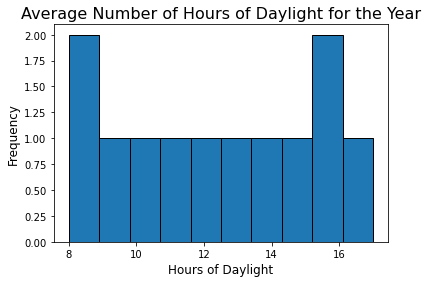

The average number of hours of daylight for the year is: 12


In [7]:
# Distribution of the number of hours of daylight in Ireland

import matplotlib.pyplot as plt
import numpy as np
number_of_hours_of_daylight = [8,10,12,14,16,17,16,15,13,11,9,8]

plt.hist(number_of_hours_of_daylight, edgecolor='black') #plotted the table for avg daylight hours in the section above
plt.title('Average Number of Hours of Daylight for the Year', size='16')
plt.xlabel('Hours of Daylight', size=12)
plt.ylabel('Frequency', size=12)

plt.show()

print('The average number of hours of daylight for the year is:', int(np.mean(number_of_hours_of_daylight)))

### Season of the year

**Datatype:**

This is a categorical variable with four value i.e. Summer, Winter, Autumn and Spring.

**Nature of the variable:**

The variable represents the season of a year.


**Reason for choosing the variable & Relationship with Independent variable:**

The season of the year will have an impact on at least two of the variables within the project dataset viz. the average number of hours of daily daylight and the average temperature. As mentioned in their respective sections, each of these variables in turn have a direct and profound impact on the averge energy consumption of a household.   


**Sources of Actual data and details:**

The actual data is easy to generate and comprises of Summer, Winter, Autumn and Spring.

The Duration of each of the Seasons is as follows (months are inclusive):

Summer = (June, July, August)
Autumn = (September, October, November)
Winter = (December, January, February)
Spring = (March, April, May)


(Reference: https://www.ireland.com/en-hk/about-ireland/discover-ireland/irelands-weather/)

Slight variations may exist depending on the source, but for the purpose of this project I have used the above categorisation.

**Statistical Distribution of Data and reasons for choosing this distribution:**

I have assumed that there is a uniform distribution for of each of the four seasons of the year. Most of the sources assume that each of the four seasons lasts for approximately 3 months and therefore this assumption is reasonable.

(Reference: https://en.wikipedia.org/wiki/Irish_calendar)


**Basis of using the statistical distribution:**

As in the section above


**Interdependence between variables:**

The Season of the year will impact the following variables within this project's dataset:

- The season of the year will impact the average number of hours of daylight. The hours of daylight are the most in Spring and Summer and the least in Autumn and Winter. The number of hours steadly increase from the middle of winter (after the winter solstice) and decrease from the middle of summer (after the summer solstice), by an average of approximately two minutes a day.
- The season of the year will impact the average temperature. Once again, the average monthly temperature will change depending on the season, however the change is linear like the number of hours of daylight. Each season will generally be distributed around the averge temperature for that season (or month within a season)


**References:**

Mention in sections above.

Daily daylight increase: https://www.reference.com/science/many-minutes-daylight-gain-day-ba517bd2fa0f7058


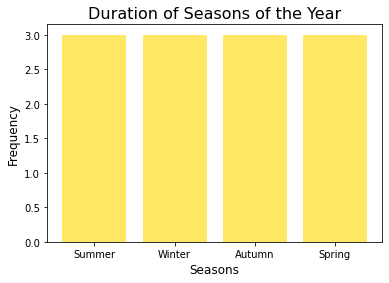

In [10]:
# Distribution of the Seasons in Ireland

import matplotlib.pyplot as plt
import numpy as np
seasons_in_ireland = {'Summer':3, 'Winter':3, 'Autumn':3, 'Spring':3}

plt.bar(seasons_in_ireland.keys(), seasons_in_ireland.values(), color='gold', alpha=0.6)

plt.title('Duration of Seasons of the Year', size='16')
plt.xlabel('Seasons', size=12)
plt.ylabel('Frequency', size=12)

plt.show()